In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/youtoxic_english_1000.csv")
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.shape

(1000, 15)

El archivo contiene 1000 registros y 15 columnas.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


In [6]:
df.describe()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,13,997,2,2,2,2,2,2,2,2,2,1,2,1
top,UgjBJKQSoQMQ6ngCoAEC,9pr1oE34bIM,run them over,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,274,3,538,647,979,839,900,862,875,992,999,1000,988,1000


Se observa lo siguiente:
- Las features *CommentId* y *VideoId* no aportan ningún valor, entonces se eliminaran.
- No existen valores faltantes.
- En las categorías *IsHomophobic* y *IsRadicalism* solo se tienen datos False.
- También existe un gran desbalanceo entre las categorías.

Primero, eliminarán las features innecesarias (*CommentId* y *VideoId* ).

Segundo, se analizaran las categorías para un correcto manejo.

In [7]:
df = df.drop(["CommentId", "VideoId"], axis=1)
df.columns

Index(['Text', 'IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative',
       'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist',
       'IsHomophobic', 'IsReligiousHate', 'IsRadicalism'],
      dtype='object')

Hay dos formas de resolver el proyecto:
1. Clasificación univariante.
2. Clasificación multivariante.

## Análisis

In [8]:
sns.set_theme()

#### Visualizar relación entre comentarios de odio y total

In [9]:
hate_df = df.select_dtypes(include="bool")
hate_df = hate_df.apply(lambda x: x.value_counts()).transpose().fillna(0)
hate_counts = hate_df.rename(columns={True: 'True', False: 'False'})
hate_counts_sort = hate_counts.sort_values(ascending=True, by="True")

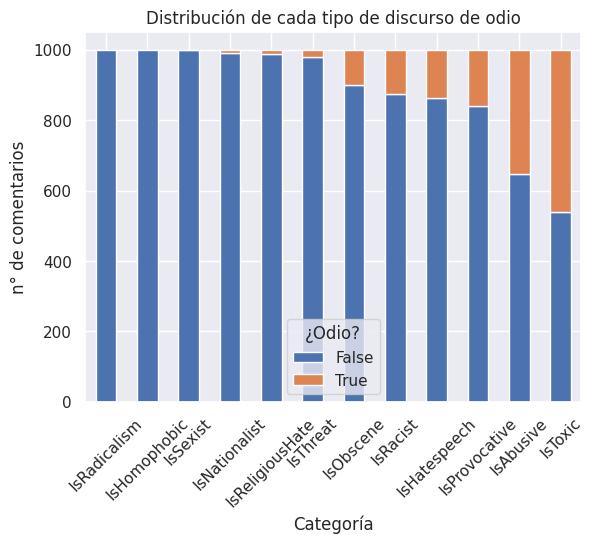

In [10]:
hate_counts_sort.plot(kind="bar", stacked=True)
plt.title('Distribución de cada tipo de discurso de odio')
plt.xlabel('Categoría')
plt.ylabel('n° de comentarios')
plt.xticks(rotation=45)
plt.legend(title='¿Odio?')
plt.show()

In [11]:
print("Porcentaje de comentarios de odio por categoría:")
hate_counts_sort["True"].apply(lambda x: x/1000 * 100)

Porcentaje de comentarios de odio por categoría:


IsRadicalism        0.0
IsHomophobic        0.0
IsSexist            0.1
IsNationalist       0.8
IsReligiousHate     1.2
IsThreat            2.1
IsObscene          10.0
IsRacist           12.5
IsHatespeech       13.8
IsProvocative      16.1
IsAbusive          35.3
IsToxic            46.2
Name: True, dtype: float64

Las features *IsRadicalism, IsHomophobic, IsSexist, IsNationalist* se van a eliminar, ya que contienen menos del 1% de la clase True. 

In [12]:
cols_to_delete = ['IsRadicalism', 'IsHomophobic', 'IsSexist', 'IsNationalist']
df_clean = df.drop(cols_to_delete, axis=1)
df_clean.head()

,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsReligiousHate
0,If only people would just take a step back and...,False,False,False,False,False,False,False,False
1,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False
2,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False
3,There are a very large number of people who do...,False,False,False,False,False,False,False,False
4,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False


**Correlación de las categorías.**

In [13]:
hate_df = df_clean.select_dtypes(include="bool")
corr_matrix = hate_df.astype(int).corr()

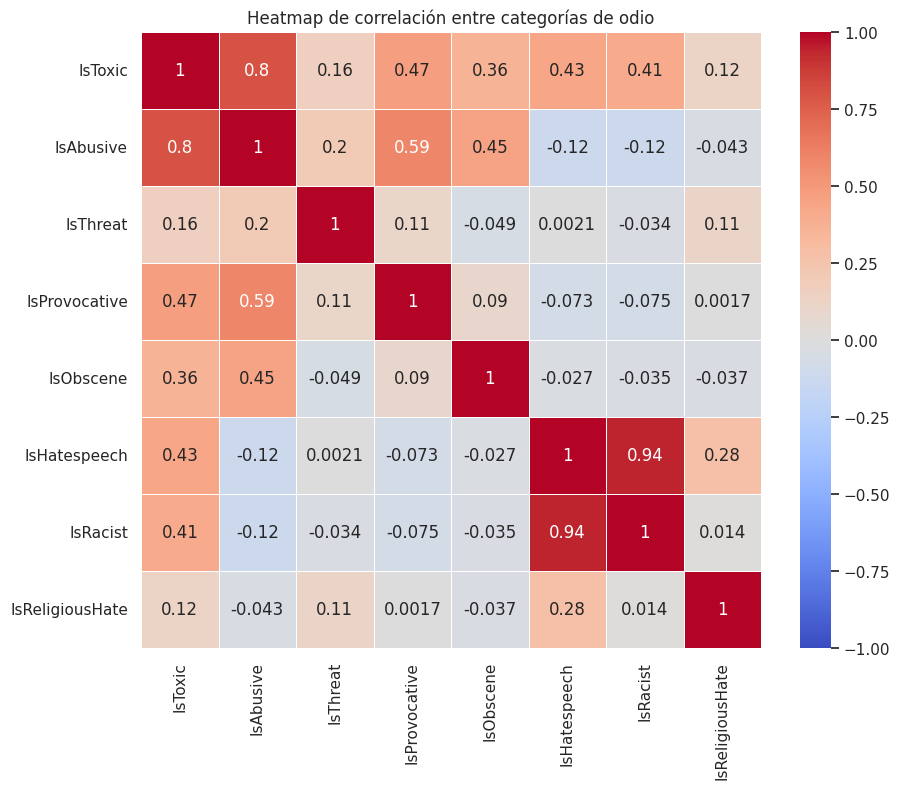

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap de correlación entre categorías de odio')
plt.show()

Se observó lo siguiente:
1. Las siguientes features: *IsReligiousHate, IsThreat* se analizarán para escoger la mejor forma de tratarlos.
2. Estas parejas de features tienen un alto grado de correlación: 
    - *IsRacist* e *IsHatespeech* = 0.94
    - *IsAbusive* e *IsToxic* = 0.8

## Resolver proyecto con una sola clase (Univariante)

#### ¿Es posible que una categoría envuelva a todas las demás? ¿IsToxic tal vez?

Se va a comprobar si IsToxic es la clase que indica si un comentario es de odio en general.

¿Por qué esta categoría? IsToxic es la clase que mayor cantidad de positivos tiene.

In [15]:
# Seleccionar solo las categorías.
hate_df = df.select_dtypes("bool")

# Quitar categoría IsToxic y guardar en un nuevo df.
df_without_toxic = hate_df.drop("IsToxic", axis=1)

# Comprobar si IsToxic contiene a las demás categorías.
coverage = {}
for col in hate_df.columns:
    if col != 'IsToxic':
        coverage[col] = (hate_df[col] & ~hate_df['IsToxic']).sum() == 0

coverage_df = pd.DataFrame(list(coverage.items()), columns=['Categoria', 'Está completamente contenida en IsToxic'])
print(coverage_df)

          Categoria  Está completamente contenida en IsToxic
0         IsAbusive                                     True
1          IsThreat                                     True
2     IsProvocative                                     True
3         IsObscene                                     True
4      IsHatespeech                                     True
5          IsRacist                                     True
6     IsNationalist                                     True
7          IsSexist                                     True
8      IsHomophobic                                     True
9   IsReligiousHate                                     True
10     IsRadicalism                                     True


Se demostró que IsToxic indica si un comentario es de odio o no lo es, entonces usaremos esa categoría como nuestra unica target.

Text(0.5, 1.0, 'Comentarios de odio')

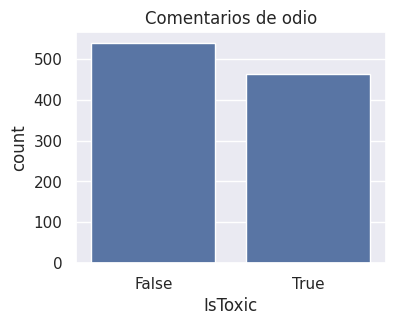

In [16]:
df_uni = df_clean[["Text", "IsToxic"]]
plt.figure(figsize=(4, 3))
sns.countplot(x=df_uni["IsToxic"])
plt.title("Comentarios de odio")

Se encuentra ligeramente balancedo la clase objetiva.

/tmp/ipykernel_6397/1055858602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uni["TextLength"] = df_uni["Text"].apply(len)


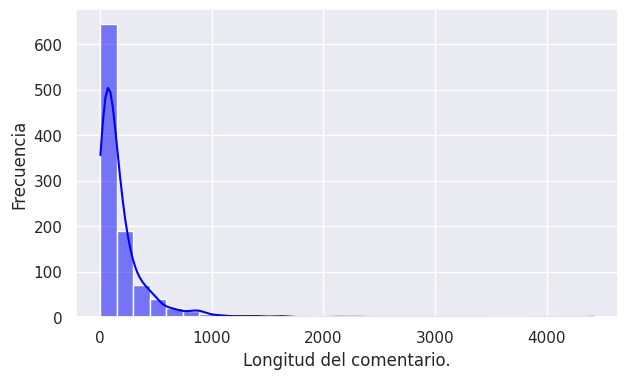

In [17]:
df_uni["TextLength"] = df_uni["Text"].apply(len)

plt.figure(figsize=(7, 4))
sns.histplot(df_uni["TextLength"], bins=30, kde=True, color="blue")

plt.xlabel("Longitud del comentario.")
plt.ylabel("Frecuencia")
plt.show()

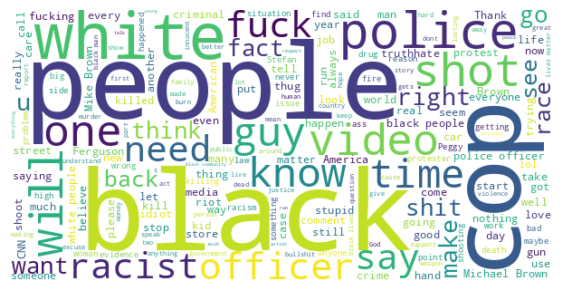

In [18]:
from wordcloud import WordCloud

all_text = " ".join(df_uni["Text"])

wordcloud = WordCloud(width=600, height=300, background_color="white").generate(all_text)

plt.figure(figsize=(7, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

/tmp/ipykernel_6397/3083887397.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frecuencia", y="Palabra", data=hate_word_counts, ax=axes[0], palette="Reds")
/tmp/ipykernel_6397/3083887397.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frecuencia", y="Palabra", data=non_hate_word_counts, ax=axes[1], palette="Blues")


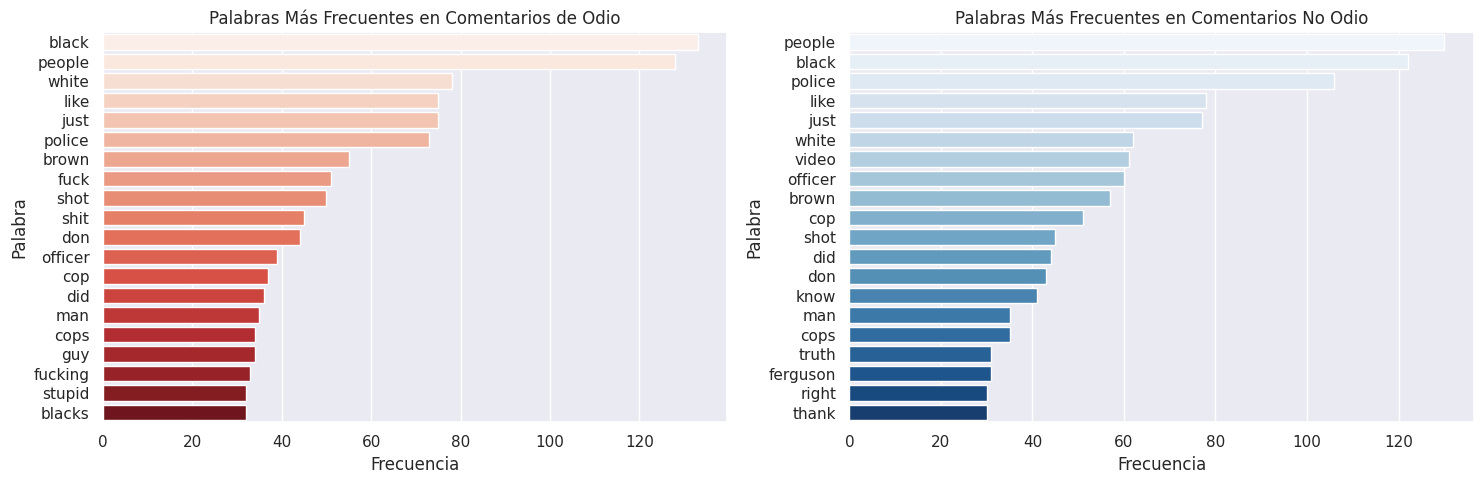

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Separar los comentarios de odio y no odio
hate_comments = df_uni[df_uni["IsToxic"] == True]["Text"]
non_hate_comments = df_uni[df_uni["IsToxic"] == False]["Text"]

# Vectorizar por separado
hate_vectorizer = CountVectorizer(stop_words="english")
hate_X = hate_vectorizer.fit_transform(hate_comments)

non_hate_vectorizer = CountVectorizer(stop_words="english")
non_hate_X = non_hate_vectorizer.fit_transform(non_hate_comments)

# Contar palabras
hate_word_counts = pd.DataFrame({"Palabra": hate_vectorizer.get_feature_names_out(), "Frecuencia": hate_X.toarray().sum(axis=0)})
hate_word_counts = hate_word_counts.sort_values(by="Frecuencia", ascending=False).head(20)

non_hate_word_counts = pd.DataFrame({"Palabra": non_hate_vectorizer.get_feature_names_out(), "Frecuencia": non_hate_X.toarray().sum(axis=0)})
non_hate_word_counts = non_hate_word_counts.sort_values(by="Frecuencia", ascending=False).head(20)

# Graficar comparación
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x="Frecuencia", y="Palabra", data=hate_word_counts, ax=axes[0], palette="Reds")
axes[0].set_title("Palabras Más Frecuentes en Comentarios de Odio")

sns.barplot(x="Frecuencia", y="Palabra", data=non_hate_word_counts, ax=axes[1], palette="Blues")
axes[1].set_title("Palabras Más Frecuentes en Comentarios No Odio")

plt.tight_layout()
plt.show()